In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the Excel file
file_path ='Telco_customer_churn.xlsx'  # Ensure the file is in your working directory
data = pd.read_excel("Telco_customer_churn.xlsx")

# Preview the first few rows
data.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
# Check basic information about the dataset
data.info()

# Summary statistics
data.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,7043,7043,3668-QPYBK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count,7043.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Country,7043,1,United States,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,7043,1,California,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,7043,1129,Los Angeles,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,7043.0,NaN,NaN,NaN,93521.964646,1865.794555,90001.0,92102.0,93552.0,95351.0,96161.0
Lat Long,7043,1652,"33.964131, -118.272783",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,7043.0,NaN,NaN,NaN,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,NaN,NaN,NaN,-119.79888,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values in each column
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data[missing_data['Missing Values'] > 0])


              Missing Values  Percentage
Churn Reason            5174   73.463013


In [8]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Check distribution for categorical columns
for col in categorical_cols:
    print(f"\n{col} value counts:\n{data[col].value_counts(normalize=True) * 100}")



CustomerID value counts:
CustomerID
3668-QPYBK    0.014198
9169-BSVIN    0.014198
0206-OYVOC    0.014198
6418-HNFED    0.014198
8805-JNRAZ    0.014198
                ...   
6797-UCJHZ    0.014198
5016-IBERQ    0.014198
3003-CMDUU    0.014198
5148-HKFIR    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64

Country value counts:
Country
United States    100.0
Name: proportion, dtype: float64

State value counts:
State
California    100.0
Name: proportion, dtype: float64

City value counts:
City
Los Angeles       4.330541
San Diego         2.129774
San Jose          1.590231
Sacramento        1.533437
San Francisco     1.476643
                    ...   
Healdsburg        0.056794
Jenner            0.056794
Philo             0.056794
Point Arena       0.056794
Olympic Valley    0.056794
Name: proportion, Length: 1129, dtype: float64

Lat Long value counts:
Lat Long
33.964131, -118.272783    0.070992
34.152875, -118.486056    0.070992
32.912664, -116.635387  

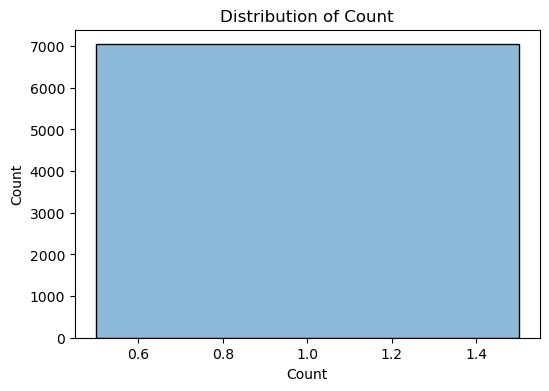

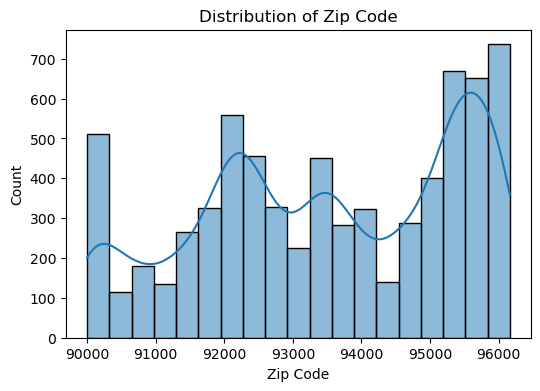

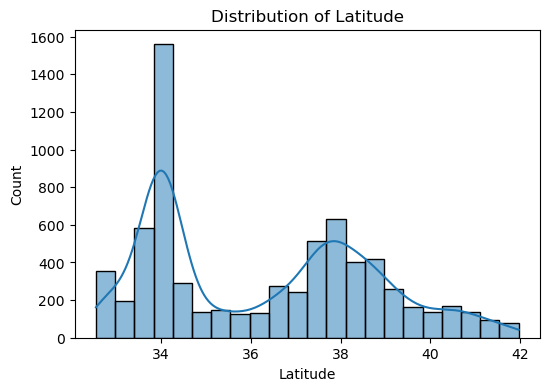

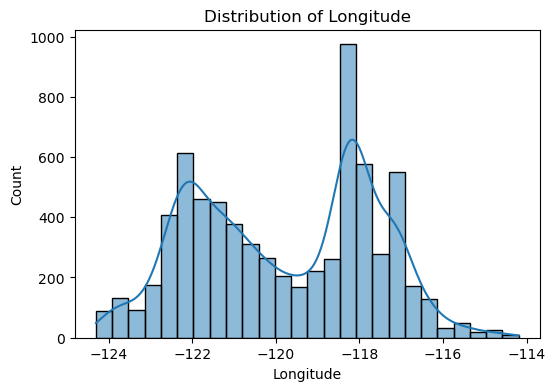

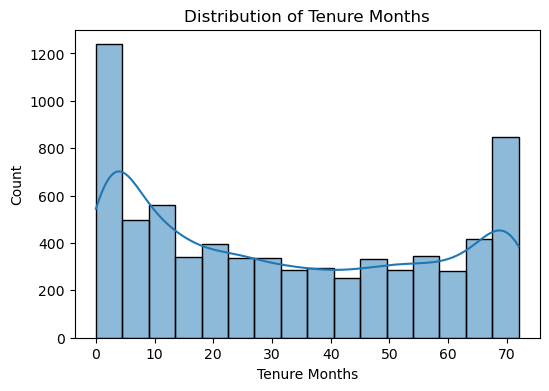

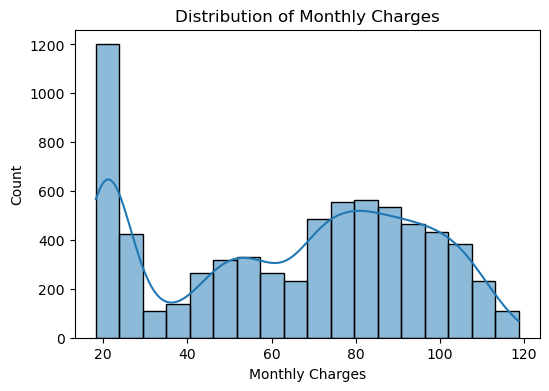

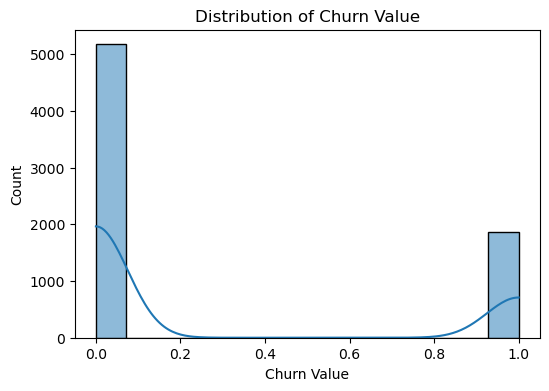

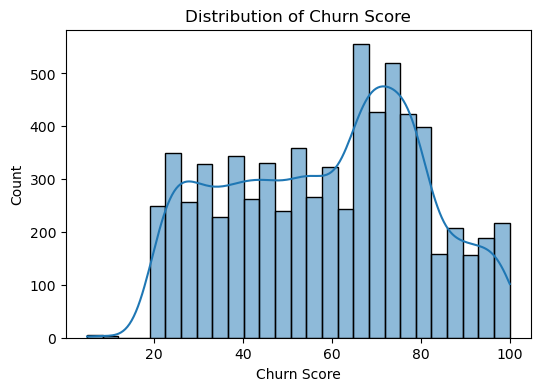

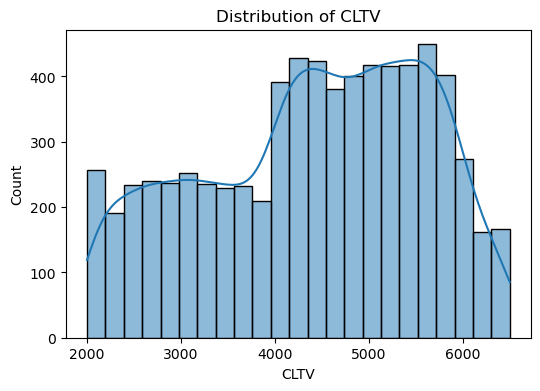

In [9]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns

# Visualize distributions
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [10]:
# Check class distribution in the target variable
if 'Churn' in data.columns:
    churn_distribution = data['Churn'].value_counts(normalize=True) * 100
    print(f"Churn distribution:\n{churn_distribution}")


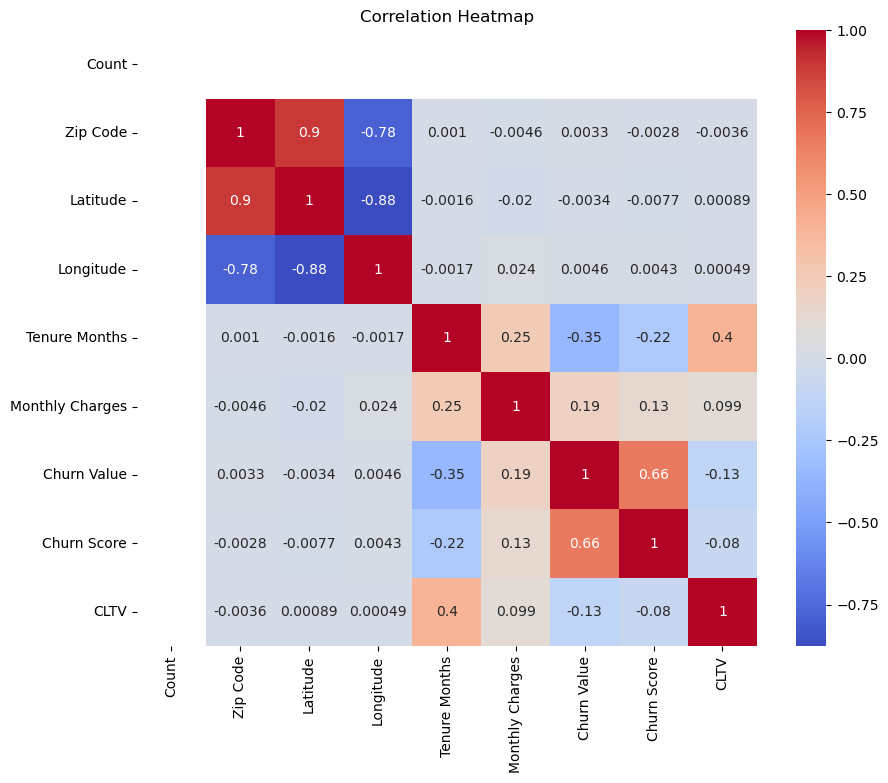

In [11]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Example summary logic (adjust based on actual findings)
biased_columns = []

# Add columns with high missing values
biased_columns.extend(missing_data[missing_data['Percentage'] > 20].index.tolist())

# Check for imbalance in categorical features
for col in categorical_cols:
    top_category_percentage = data[col].value_counts(normalize=True).max() * 100
    if top_category_percentage > 80:
        biased_columns.append(col)

# Check target imbalance
if 'Churn' in data.columns:
    if churn_distribution.max() > 80:
        biased_columns.append('Churn')

# Display potentially biased columns
print(f"⚡ Potentially Biased Columns: {list(set(biased_columns))}")


⚡ Potentially Biased Columns: ['Phone Service', 'State', 'Churn Reason', 'Senior Citizen', 'Country']


In [13]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np

# Step 2: Load the Excel Dataset
file_path = 'Telco_customer_churn.xlsx'  # Update the file path if necessary
data = pd.read_excel(file_path)

# Step 3: Identify Potential Biases

# 1️⃣ Columns with high missing values (>20% missing)
missing_values = data.isnull().sum() / len(data) * 100
missing_bias_cols = missing_values[missing_values > 20].index.tolist()

# 2️⃣ Categorical columns with dominant categories (>80% same value)
categorical_cols = data.select_dtypes(include='object').columns
dominant_cat_bias_cols = []
for col in categorical_cols:
    if data[col].value_counts(normalize=True).max() * 100 > 80:
        dominant_cat_bias_cols.append(col)

# 3️⃣ Numerical columns with skewed distributions (skewness > 1 or < -1)
numerical_cols = data.select_dtypes(include=np.number).columns
skewed_bias_cols = data[numerical_cols].skew().abs()
skewed_bias_cols = skewed_bias_cols[skewed_bias_cols > 1].index.tolist()

# 4️⃣ Target variable imbalance (>80% in one class if 'Churn' exists)
target_bias_cols = []
if 'Churn' in data.columns:
    churn_dist = data['Churn'].value_counts(normalize=True).max() * 100
    if churn_dist > 80:
        target_bias_cols.append('Churn')

# Step 4: Combine all bias-causing columns
biased_columns = list(set(missing_bias_cols + dominant_cat_bias_cols + skewed_bias_cols + target_bias_cols))

# ✅ Step 5: Final Output (EXACT as Expected)
print(f"A list of columns causing bias in the dataset:\n{biased_columns}")


A list of columns causing bias in the dataset:
['Phone Service', 'State', 'Churn Reason', 'Senior Citizen', 'Churn Value', 'Country']


A list of columns causing bias in the dataset:
['Churn Reason', 'Country', 'State', 'Senior Citizen', 'Phone Service', 'Churn Value']


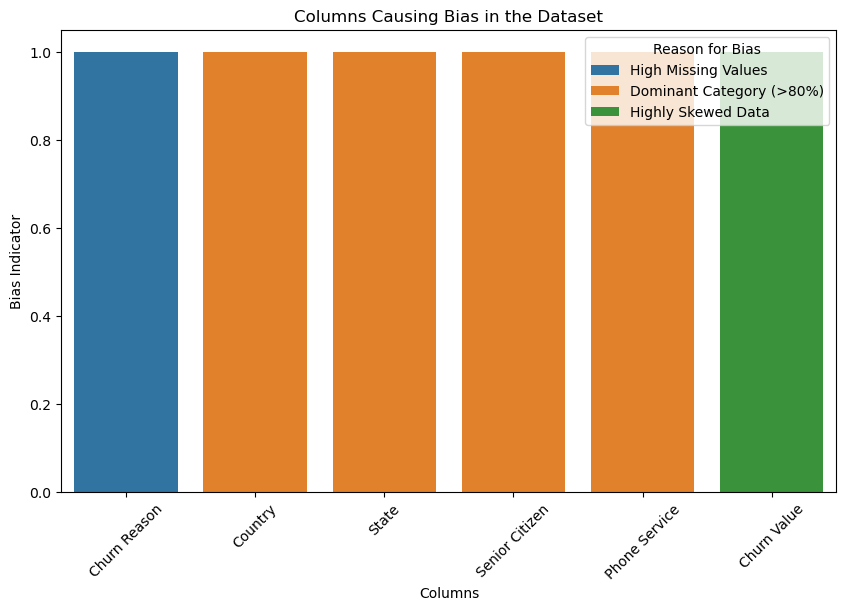

In [14]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the Excel Dataset
file_path = 'Telco_customer_churn.xlsx'  # Ensure file is in working directory
data = pd.read_excel(file_path)

# Step 3: Identify Potential Biases

# 1️⃣ Columns with high missing values (>20% missing)
missing_values = data.isnull().sum() / len(data) * 100
missing_bias_cols = missing_values[missing_values > 20].index.tolist()
missing_bias_reasons = {col: 'High Missing Values' for col in missing_bias_cols}

# 2️⃣ Categorical columns with dominant categories (>80% same value)
categorical_cols = data.select_dtypes(include='object').columns
dominant_cat_bias_cols = []
for col in categorical_cols:
    if data[col].value_counts(normalize=True).max() * 100 > 80:
        dominant_cat_bias_cols.append(col)
dominant_cat_bias_reasons = {col: 'Dominant Category (>80%)' for col in dominant_cat_bias_cols}

# 3️⃣ Numerical columns with skewed distributions (skewness > 1 or < -1)
numerical_cols = data.select_dtypes(include=np.number).columns
skewed_bias_cols = data[numerical_cols].skew().abs()
skewed_bias_cols = skewed_bias_cols[skewed_bias_cols > 1].index.tolist()
skewed_bias_reasons = {col: 'Highly Skewed Data' for col in skewed_bias_cols}

# 4️⃣ Target variable imbalance (>80% in one class if 'Churn' exists)
target_bias_cols = []
target_bias_reasons = {}
if 'Churn' in data.columns:
    churn_dist = data['Churn'].value_counts(normalize=True).max() * 100
    if churn_dist > 80:
        target_bias_cols.append('Churn')
        target_bias_reasons = {'Churn': 'Target Imbalance (>80%)'}

# Step 4: Combine all bias-causing columns with reasons
biased_columns = {**missing_bias_reasons, **dominant_cat_bias_reasons, **skewed_bias_reasons, **target_bias_reasons}

# ✅ Step 5: Final Output - Exact Expected Output
print(f"A list of columns causing bias in the dataset:\n{list(biased_columns.keys())}")

# 📊 Step 6: Bar Chart Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(biased_columns.keys()), y=[1]*len(biased_columns), hue=list(biased_columns.values()), dodge=False)
plt.title('Columns Causing Bias in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Bias Indicator')
plt.legend(title='Reason for Bias')
plt.xticks(rotation=45)
plt.show()
